# DSA2101 project LEGGO

## Introduction
### The LEGO dataset is a comprehensive collection of information containing various aspects of LEGO products. this emcompasses elements, colors, inventories, minifigures, parts, sets, themes and their relationships. There are 12 interrelated datasets that include details about LEGO products such as types of element, inventories of sets and parts and attributes of minifigures.


## Data cleaning and summary

### Cleaning: Our group has chosen to use data from the ‘inventory_parts’ ,’inventories’,’sets’ and ‘colors’ dataset to come up with the three visualisations in the following portion. In df1, we used left_join() to join the first two datasets (namely the inventory_parts and colors dataset) using their color_id and omitted the na values to keep the relevant rows only, then we used the select() to omit columns which were redundant and would not be required in the visualisations. The similar process was done to obtain df2 but this time the left_join was used to join df1 with an additional dataset(inventories),and repeated once more to get df3( by joining df2 to the final dataset we will use, which is the sets dataset)

### Summary: Upon analysis of our cleaned dataset, we found that there are 13509 unique sets across 436 distinct themes. There are 204 unique colours, and amidst this, the colour "Black" stands as the colour most frequently used, while "Duplo Medium Green" is the rarest. The LEGO sets span from 1949 to 2022, with the average number of parts hovering around 694. Interestingly, we also found that there are some sets with 0 parts. This suggests anomalies or inaccurate data collection.

## Question: How has colors in the Lego sets changed across the years?

In [ ]:
library(tidyverse)
colors = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-06/colors.csv.gz')
inventory_parts = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-06/inventory_parts.csv.gz')
inventories = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-06/inventories.csv.gz')
sets = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-06/sets.csv.gz')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 217 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): name, rgb
dbl (1): id
lgl (1): is_trans

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1062999 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): part_num, img_url
dbl (3)

### Data Cleaning

In [ ]:
part_colors = inventory_parts %>%
  left_join(colors, by = c("color_id" = "id")) %>%
  select(-is_spare, -img_url, -is_trans)

sum(is.na(part_colors)) #no missing values

part_colors_set = part_colors %>%
  left_join(inventories, by = c("inventory_id" = "id")) %>% #added "version" and "set_num"
  left_join(sets, by = "set_num", suffix = c("_color", "_set")) %>% #added "name_set" "year" "theme_id" "num_parts" "img_url"
  select(-version, -img_url)
head(part_colors_set)

[1] 0

inventory_id,part_num,color_id,quantity,name_color,rgb,set_num,name_set,year,theme_id,num_parts
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,48379c01,72,1,Dark Bluish Gray,6C6E68,7922-1,McDonald's Sports Set Number 6 - Orange Vest Snowboarder,2004,460,5
1,48395,7,1,Light Gray,9BA19D,7922-1,McDonald's Sports Set Number 6 - Orange Vest Snowboarder,2004,460,5
1,stickerupn0077,9999,1,[No Color/Any Color],05131D,7922-1,McDonald's Sports Set Number 6 - Orange Vest Snowboarder,2004,460,5
1,upn0342,0,1,Black,05131D,7922-1,McDonald's Sports Set Number 6 - Orange Vest Snowboarder,2004,460,5
1,upn0350,25,1,Orange,FE8A18,7922-1,McDonald's Sports Set Number 6 - Orange Vest Snowboarder,2004,460,5
3,2343,47,1,Trans-Clear,FCFCFC,3931-1,Emma's Splash Pool,2012,494,43


### Summary Statistics

In [ ]:
summary_stats = part_colors_set %>%
  summarise(
    num_of_uniq_themes = n_distinct(theme_id),
    num_of_uniq_sets = n_distinct(name_set),
    num_of_uniq_colors = n_distinct(color_id),
    least_color = names(which.min(table(name_color))),
    most_color = names(which.max(table(name_color))),
    year_range = paste(min(year, na.rm = TRUE), "-", max(year, na.rm = TRUE)),
    min_num_parts = min(num_parts, na.rm = TRUE),
    max_num_parts = max(num_parts, na.rm = TRUE),
    avg_num_parts = mean(num_parts, na.rm = TRUE)
  )
summary_stats


num_of_uniq_themes,num_of_uniq_sets,num_of_uniq_colors,least_color,most_color,year_range,min_num_parts,max_num_parts,avg_num_parts
<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
436,13509,204,Duplo Medium Green,Black,1949 - 2022,0,11695,694.4607


## Visualisations

### Scatter Plot

In [ ]:
# find most popular x colours from the entire data set
top_10_colors = part_colors_set %>%
  count(name_color, rgb) %>%
  arrange(desc(n)) %>%
  head(10)

top_10_colors_names = top_10_colors %>% pull(name_color)
top_10_colors_rgb = top_10_colors %>% arrange(name_color) %>% pull(rgb)

In [ ]:
# df that contains the number of observations, for the above top 10 colours, for each year
data = part_colors_set %>%
  filter(name_color %in% top_10_colors_names) %>%
  count(year, name_color, wt = quantity)
head(data)

year,name_color,n
<dbl>,<chr>,<dbl>
1949,Blue,96
1949,Red,139
1949,White,185
1949,Yellow,106
1950,Blue,10
1950,Red,3


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
Warning message:
“Removed 175 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 175 rows containing missing values (`geom_point()`).”


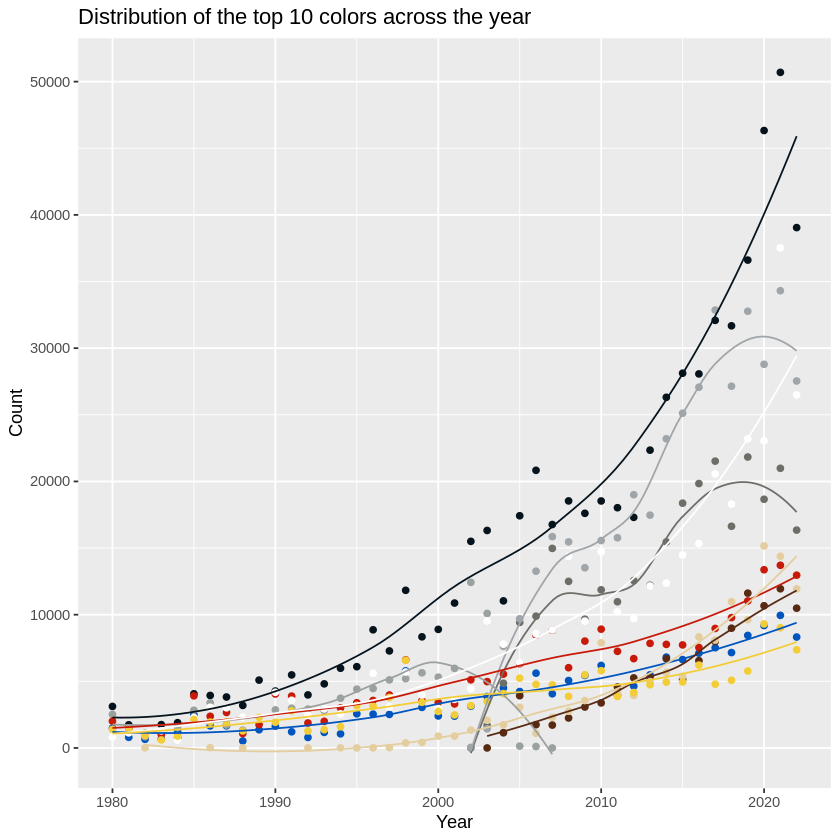

In [ ]:
ggplot(data = data) +
  geom_point(aes(x = year, y = n, color = name_color)) +
  xlim(1980, 2022) +
  scale_color_manual(values = paste0("#", top_10_colors_rgb)) +
  geom_smooth(aes(x = year, y = n, color = name_color), se = FALSE, size = 0.5) +
  labs(x = "Year", y = "Count", title = "Distribution of the top 10 colors across the year") +
  theme(legend.position = "none")

For this scatterplot, our group has decided to focus on years after 1980 only, as the observations of those before 1980 were relatively small and cluttered, making it difficult to establish any meaningful relationships or trends. We  chose to focus on the top 10 most popular colors only for the same reasons.

This is a plot of count against time, with each data point representing the number of lego pieces of that color for a particular year. We added a LOESS curve for each color as well to make it easier for us to identify the general trends.

From the figure above, we can see a general increasing trend for all the colors, with Black being the all time most popular color, followed by the grays and white. Number of Light Gray legos increased from 1980 to 2000, before decreasing steeply and then later discontinued around 2007, while other colors such as Dark Bluish Gray, Light Bluish Gray and Reddish Brown were only introduced in the early 2000s. Another interesting observation would be that the most popular colors consist of mostly neutral colors such as monochromatic shades of black and primary colors.

###Line Plot

In [ ]:
# line plot: unique colours against time
num_unique_year = part_colors_set %>%
  distinct(name_color, year) %>%
  na.omit() %>%
  count(year)
head(num_unique_year)

year,n
<dbl>,<int>
1949,10
1950,3
1953,5
1954,7
1955,7
1956,6


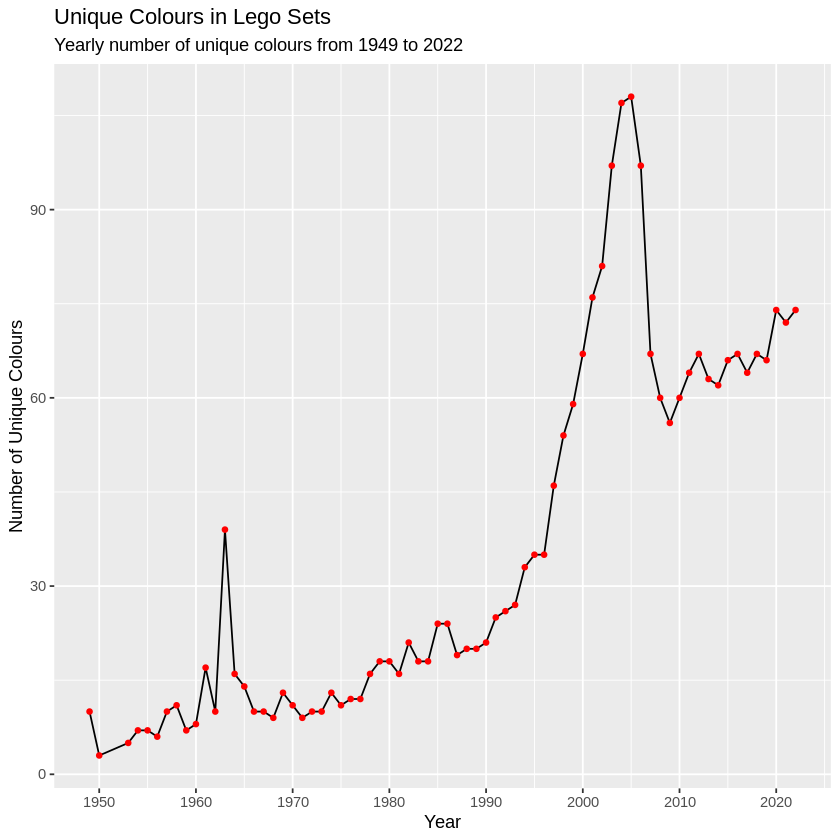

In [ ]:
ggplot(data = num_unique_year, aes(x = year, y = n)) +
  geom_line() +
  geom_point(color = "red", size = 1.2) +
  scale_x_continuous(breaks = seq(1940, 2023, 10)) +
  labs(title = "Unique Colours in Lego Sets",
       subtitle = "Yearly number of unique colours from 1949 to 2022",
       x = "Year", y = "Number of Unique Colours")

In [ ]:
# do Exploratory Data Analysis to investigate peak in 1963
part_colors_set %>%
  filter(year == 1963) %>%
  distinct(name_color)
# many "Modulex" colour

name_color
<chr>
White
Red
Blue
Trans-Clear
Light Gray
Milky White
Black
Yellow
Green


Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `year_range = paste(min(year, na.rm = TRUE), "-", max(year,
  na.rm = TRUE))`.
ℹ In group 203: `color_id = 1089`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


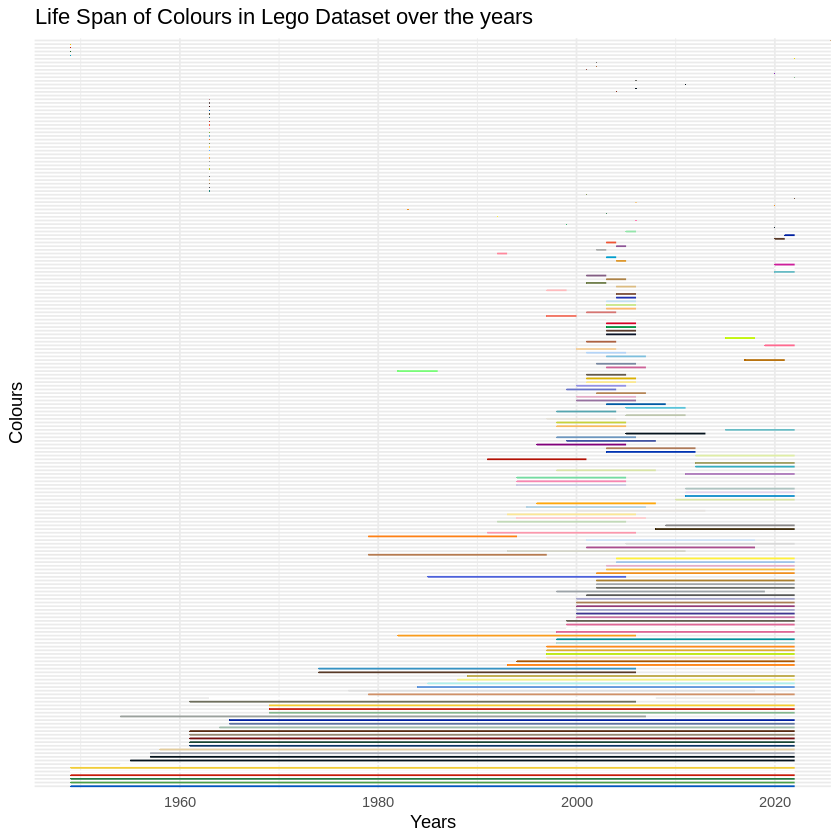

In [ ]:
color_id_year_range = part_colors_set %>%
  group_by(color_id) %>%
  summarise(year_range = paste(min(year, na.rm = TRUE), "-", max(year, na.rm = TRUE)))

color_id_life_span = color_id_year_range %>%
  separate(year_range, into = c("start_year", "end_year"), convert = TRUE ) %>%
  mutate(lifespan = `end_year` - `start_year` + 1 ) %>%
  arrange(lifespan) %>%
  select(color_id, start_year, end_year, lifespan)

color_theme_life_span = color_id_life_span %>%
  left_join(colors, by = c("color_id"="id")) %>%
  mutate(name = reorder(name, desc(lifespan))) %>%
  mutate(rgb = paste0("#", rgb))


ggplot(color_theme_life_span, aes(x = name, y = start_year)) +
  geom_segment(aes(xend = name, y = start_year, yend = end_year, color = I(rgb))) +
  geom_point(shape = ".", aes(color = I(rgb))) +
  coord_flip() +
  labs(title = "Life Span of Colours in Lego Dataset over the years",
       x = "Colours", y = "Years") +
  theme_minimal() +
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank())

For this line segment plot, we decided to look at the lifespan of the colors in the lego data set over the years from 1949 to 2022. For each color, we determined the year it was introduced to the end of its existence. From the plot, it is clear that even though the number of colors introduced over time has increased, the lifespan of the colors introduced later became shorter. The "Vintage" colors such as Black, White, Red, Yellow, Green, Blue were introduced as the first few lego colors and were kept.

From the plot, it shows an increase in the number of colours at the start of early 2000s however a sudden decrease after a few years around 2007.



### Visualisation Finding
#### useful link: https://groovyhistory.com/lego-modulex-architect-bricks-1963/4 (Modulex, a company under Lego, started then)
#### talk about trend from 2000 to 2010 too

## Discussions

## References
### Georgios Karamanis. (2022). LEGO dataset [Data set]. TidyTuesday. https://github.com/rfordatascience/tidytuesday/tree/master/data/2022/2022-09-06

name_color,rgb,year
<chr>,<chr>,<dbl>
Dark Bluish Gray,#6C6E68,2004
Light Gray,#9BA19D,2004
[No Color/Any Color],#05131D,2004
Black,#05131D,2004
Orange,#FE8A18,2004
Trans-Clear,#FCFCFC,2012
Bright Pink,#E4ADC8,2012
Green,#237841,2012
White,#FFFFFF,2012


Warning message:
“Removed 108 rows containing non-finite values (`stat_count()`).”


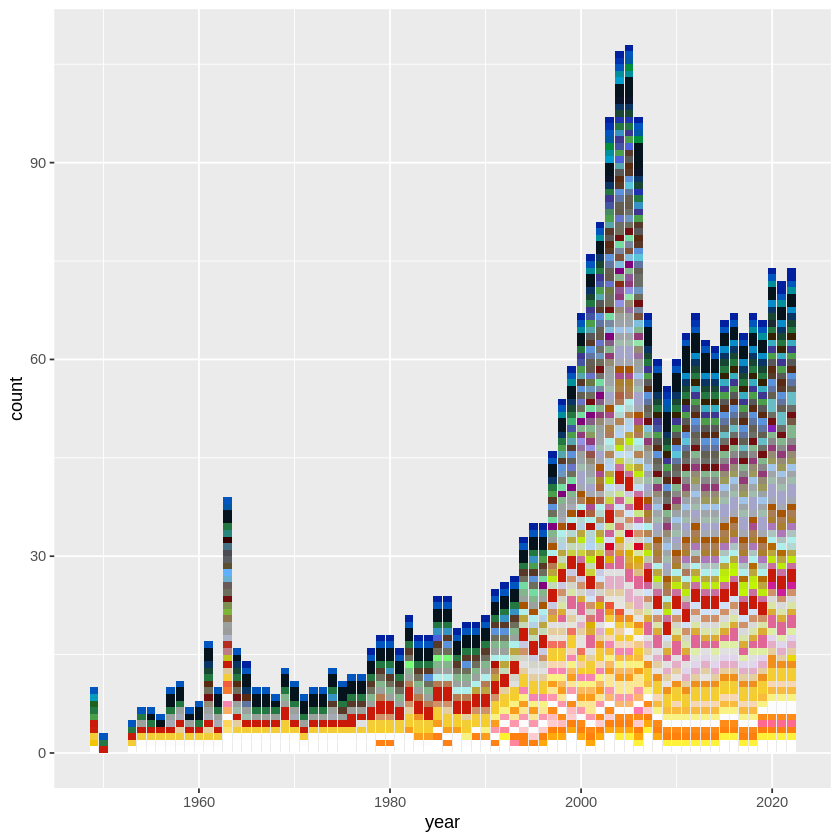

In [ ]:
# line plot: unique colours against time
num_unique_year = part_colors_set %>%
  mutate(rgb = paste0("#", rgb)) %>%
  distinct(name_color, rgb, year)
num_unique_year

all_rbg = num_unique_year$rgb
names(all_rbg) = all_rbg

num_unique_year %>%
  ggplot(aes(x=year, fill = I(rgb)))+
  geom_bar()
# +
  # ggplot(aes(x = year, fill = rgb)) +
  # scale_fill_manual(values = all_rbg)